# Dyna Architecture: Comparing planning agents vs. regular agents

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rlforge.agents.tabular import QAgent, ExpectedSarsaAgent
from rlforge.environments import DynaMaze, ShortcutMaze
from rlforge.experiments import ExperimentRunner

In [2]:
env = DynaMaze()
expected_sarsa_agent = ExpectedSarsaAgent(step_size=0.5,
                                          discount=0.95,
                                          num_states=env.observation_space.n,
                                          num_actions=env.action_space.n,
                                          epsilon=0.1)
dyna_q_agent = QAgent(step_size=0.5,
                      discount=0.95,
                      num_states=env.observation_space.n,
                      num_actions=env.action_space.n,
                      epsilon=0.1,
                      planning=True,
                      planning_steps=10,
                      exploration_bonus=0)
dyna_q_plus_agent = QAgent(step_size=0.5,
                           discount=0.95,
                           num_states=env.observation_space.n,
                           num_actions=env.action_space.n,
                           epsilon=0.1,
                           planning=True,
                           planning_steps=10,
                           exploration_bonus=0.001)

In [3]:
algorithms = ["Expected SARSA", "DynaQ", "DynaQ+"]
agents = [expected_sarsa_agent, dyna_q_agent, dyna_q_plus_agent]

rewards_list = []
steps_per_episode_list = []
results_by_agent = {}

for name, agent in zip(algorithms, agents):
    runner = ExperimentRunner(env, agent)

    results = runner.run_episodic(
        num_runs=30,
        num_episodes=50,
        max_steps_per_episode=10000
    )

    # Collect arrays for plotting/comparison
    rewards_list.append(results["rewards"])
    steps_per_episode_list.append(results["steps"])
    results_by_agent[name] = results

    # Optional: print a quick summary for each agent
    print(f"\n{name} Summary:")
    runner.summary(last_n=5)


Expected SARSA Summary:
 Experiment Summary (Episodic)
Runs: 30
Average runtime per run: 0.255 seconds
Episodes per run: 50
First episode mean reward: 1.000
Last episode mean reward: 1.000
Overall mean reward: 1.000
Mean reward (last 5 episodes): 1.000
First episode mean steps: 1076.9
Last episode mean steps: 17.6
Overall mean steps: 97.0



DynaQ Summary:
 Experiment Summary (Episodic)
Runs: 30
Average runtime per run: 0.466 seconds
Episodes per run: 50
First episode mean reward: 1.000
Last episode mean reward: 1.000
Overall mean reward: 1.000
Mean reward (last 5 episodes): 1.000
First episode mean steps: 823.0
Last episode mean steps: 15.9
Overall mean steps: 34.8



DynaQ+ Summary:
 Experiment Summary (Episodic)
Runs: 30
Average runtime per run: 0.364 seconds
Episodes per run: 50
First episode mean reward: 1.000
Last episode mean reward: 1.000
Overall mean reward: 1.000
Mean reward (last 5 episodes): 1.000
First episode mean steps: 349.2
Last episode mean steps: 18.7
Overall mean steps: 27.6


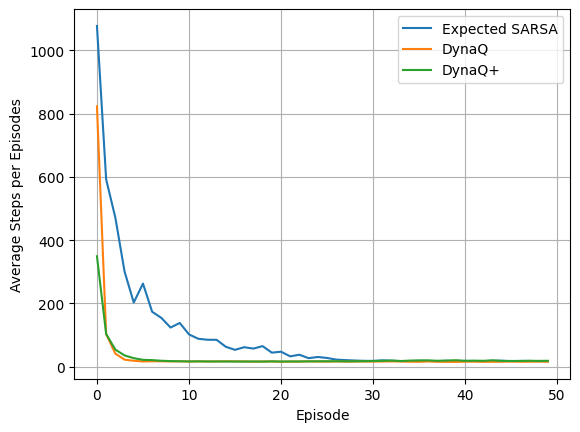

In [4]:
for idx, algo_steps in enumerate(steps_per_episode_list):

  plt.plot(np.mean(algo_steps, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Steps per Episodes")
plt.legend()
plt.grid()

In [5]:
env = ShortcutMaze(shortcut_episodes=20)
dyna_q_agent = QAgent(step_size=0.5,
                      discount=0.95,
                      num_states=env.observation_space.n,
                      num_actions=env.action_space.n,
                      epsilon=0.1,
                      planning=True,
                      planning_steps=10,
                      exploration_bonus=0)
dyna_q_plus_agent = QAgent(step_size=0.5,
                           discount=0.95,
                           num_states=env.observation_space.n,
                           num_actions=env.action_space.n,
                           epsilon=0.1,
                           planning=True,
                           planning_steps=10,
                           exploration_bonus=0.001)

In [7]:
algorithms = ["DynaQ", "DynaQ+"]
agents = [dyna_q_agent, dyna_q_plus_agent]

rewards_list = []
steps_per_episode_list = []
results_by_agent = {}

for name, agent in zip(algorithms, agents):
    runner = ExperimentRunner(env, agent)

    results = runner.run_episodic(
        num_runs=30,
        num_episodes=50,
        max_steps_per_episode=10000
    )

    # Collect arrays for plotting/comparison
    rewards_list.append(results["rewards"])
    steps_per_episode_list.append(results["steps"])
    results_by_agent[name] = results

    # Optional: print a quick summary for each agent
    print(f"\n{name} Summary:")
    runner.summary(last_n=5)


DynaQ Summary:
 Experiment Summary (Episodic)
Runs: 30
Average runtime per run: 0.514 seconds
Episodes per run: 50
First episode mean reward: 1.000
Last episode mean reward: 1.000
Overall mean reward: 1.000
Mean reward (last 5 episodes): 1.000
First episode mean steps: 307.6
Last episode mean steps: 36.5
Overall mean steps: 38.1



DynaQ+ Summary:
 Experiment Summary (Episodic)
Runs: 30
Average runtime per run: 0.523 seconds
Episodes per run: 50
First episode mean reward: 1.000
Last episode mean reward: 1.000
Overall mean reward: 1.000
Mean reward (last 5 episodes): 1.000
First episode mean steps: 323.8
Last episode mean steps: 29.2
Overall mean steps: 38.8


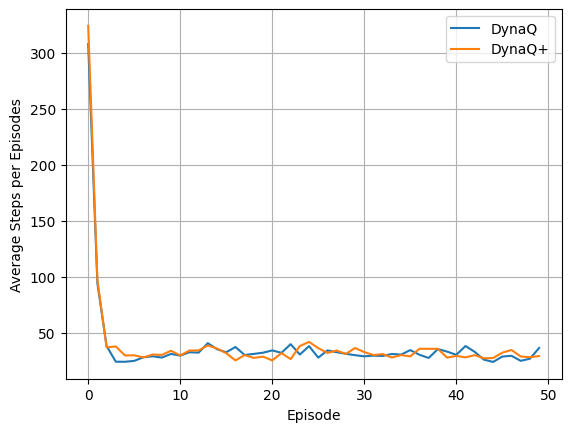

In [8]:
for idx, algo_steps in enumerate(steps_per_episode_list):

  plt.plot(np.mean(algo_steps, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Steps per Episodes")
plt.legend()
plt.grid()